In [1]:
from IPython.display import IFrame, Image, HTML



1. Community Demographics

2. Wealth Management

# Longtail Financial Overview
By Shawn Anderson for the Greenbank Network Think Tank Meeting
Kelowna BC, Sept 2019

In [2]:
i1 = '<iframe width="560" height="315" style="pointer-events: none;" src="https://www.youtube.com/embed/WHZEmDe2IAE?&autoplay=1&controls=0&&showinfo=0&loop=1&playlist=WHZEmDe2IAE&mute=1" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'
i2 = '<iframe width="560" height="315" style="pointer-events: none;" src="https://www.youtube.com/embed/e761__eb61s?controls=0&autoplay=1&controls=0&&showinfo=0&loop=1&playlist=e761__eb61s&mute=1" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'
i3 = '<iframe width="560" height="315" style="pointer-events: none;" src="https://www.youtube.com/embed/sU8z5yiRKF4?controls=0&autoplay=1&controls=0&&showinfo=0&loop=1&playlist=sU8z5yiRKF4&mute=1" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'
i4 = '<iframe width="560" height="315" style="pointer-events: none;" src="https://www.youtube.com/embed/I601lRxg5SY?version=3&autoplay=1&controls=0&&showinfo=0&loop=1&playlist=I601lRxg5SY&mute=1" frameborder="0" allow="accelerometer; autoplay=1; loop=1; controls=1; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'
style = '''
<style>
.ytplayer {pointer-events: none;}
</style>
'''
html = '''
<table>
    <tr>
        <td>{0}</td>
        <td>{1}</td>
    </tr>
    <tr>
        <td>{2}</td>
        <td>{3}</td>
    </tr>
</table>
'''.format(i1,i2,i3,i4)#,style)
HTML(html)

,
,


You can Find these videos and much more on my website:

https://shawnwanderson.github.io/portfolio/

##  You can ask me anything about:

Blockchain / Cryptocurrency / AI / Cloud Computing / Web Development / Quantitative Finance

#### [Placeholder] Web

## Longtail Financial
A new approach to wealth management.

Our competetive advantage lies at the intersection of three emerging phenomenon:

Interactive Computing / Open AI / Decentralized Finance

#### [Placeholder] Ven Diagram

### Interactive Computing

In [5]:
IFrame('https://www.quansight.com/', 1200, 500)

### Open AI

In [6]:
IFrame('https://openai.com/', 1200, 500)

#### Canadian AI Landscape
Geoffry Hinton (Toronto)  
Joshua Bengio (Montreal)  
Ian Goodfellow (Montreal)  
Richard Sutton (University of Alberta)  
Greg Mori (SFU)  
Elon Musk (Queens University)  

### Decentralized Finance

https://coinmarketcap.com  
https://binance.com/en    

In [7]:
IFrame('https://roobee.io',800,500)

### Roadmap
Phase 1 / Phase 2 / Phase 3

### Phase 1

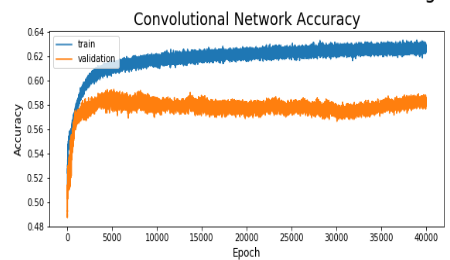

In [15]:
Image('./training.png')

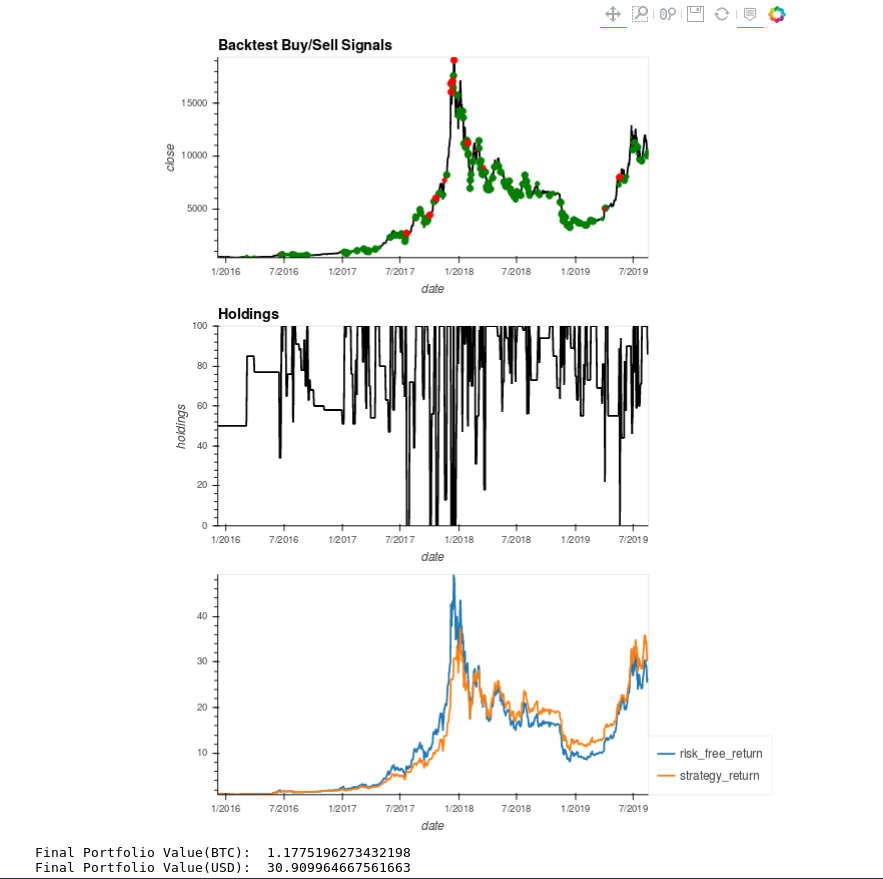

In [16]:
Image('backtests.png')

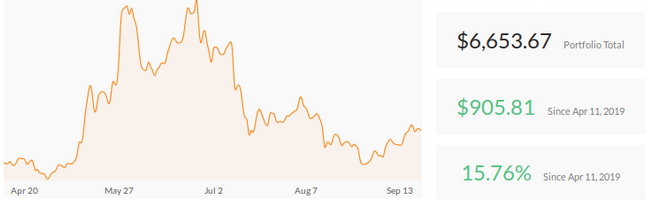

In [14]:
Image('./polo2.png')

### Phase 2
https://github.com/Kismuz/btgym  
https://github.com/ZhengyaoJiang/PGPortfolio

### Phase 3
https://vc.eos.io/about-eos-vc/  
https://launchpad.binance.com/en   

### A Recipe for Wealth Management
The Bond / The Hedge / The Algorithms / The Ecosystem

### Demo

1. Panel the Prices

2. Vectorize MPT

In [2]:
import hvplot.pandas
from pystore import store
collection = store('ltf').collection('kelowna')
data = collection.item('compare').to_pandas()

In [3]:
from datetime import datetime
import panel as pn
date_range_slider = pn.widgets.DateRangeSlider(
    name='Date Range',
    start=datetime(1989,9,15), 
    end=datetime(2019, 9, 15),
    value=(datetime(2009, 9, 15), datetime(2019,9,15))
)

asset_group = pn.widgets.CrossSelector(
    name='Assets', 
    value=['SP500'], 
    options=list(data.columns))

@pn.depends(asset_group.param.value, date_range_slider.param.value)
def get_plot(assets, date_range):
    start,end = date_range
    selection = data.loc[start:end][assets]
    normalized = selection / selection.loc[start]
    plot = normalized.hvplot.line(logy=True)
    return plot

widgets = pn.WidgetBox('## Portfolio Analysis', asset_group, date_range_slider)
pn.Column(widgets, get_plot).servable()

Column
    [0] WidgetBox(css_classes=['widget-box'])
        [0] Markdown(str)
        [1] CrossSelector(name='Assets', options=['SP500', 'Russell 2000 (S...], value=['SP500'])
        [2] DateRangeSlider(end=datetime.datetime(2019, ..., name='Date Range', start=datetime.datetime(1989, ..., value=(datetime.datetime(2009, ...)
    [1] ParamFunction(function)

In [41]:
import import_ipynb
from resources import *

trend_30 = {
    'symbols':[  
        'SP500',
        'F',
        'WMT',
        'HD',
        'SNE',
        'AAPL',
        'MSFT',
        'BRK-A', 
        'GOLD',
        'SILV',
        'CAD/USD',
        'IMF Crude',         
        ],
    'start':'1989-09-15',
    'end': '2019-09-15',
    'freq': 'daily',
    'ticker_map': ticker_map,
    'collection': collection,
    'title': "30 Year Capital Markets"
}

trend_15 = {
    'symbols':[  
        'SP500',
        'HD',
        'SNE',
        'AAPL',
        'MSFT',
        'GOLD',  
        'FB',
        ],
    'start':'2004-09-15',
    'end': '2019-09-15',
    'freq': 'daily',
    'ticker_map': ticker_map,
    'collection': collection,
    'title': "15 Year Capital Markets"
}

cryptocurrency = copy.deepcopy(trend_15)
cryptocurrency.update({
    'symbols': ['BTC','ETH','LTC','XRP-USD'],
    'title':"Cryptocurrencies",
    'start':'2012-09-15',
    'end': '2019-09-15',
})

# list(crypto.keys())
params = cryptocurrency
data = fetch(params['symbols'],
         params['ticker_map'],
         params['start'],
         params['end'],
         params['freq'],
         params['collection'],
         use_cache=True, 
         verbose=0,
            )

In [42]:
comp_start = params['start']
comp_end   = params['end']
# comp_start = '2017-01-01'
# comp_end = '2018-01-01'
comp = compare(data, comp_start, comp_end)

title = "{} {}:{}".format(params['title'],comp_start[:4],comp_end[:4])
comp.hvplot.line(logy=True, title=title)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [34]:
daily_returns = comp.pct_change()[1:]
performance = pd.DataFrame()
performance['Annual Return'] = daily_returns.mean()*365
performance['Volatility'] = daily_returns.var(ddof=1)*365
# performance['Sharpe Ratio'] = performance['Annual Return']/performance['Volatility']
performance.sort_values('Annual Return',ascending=False)

,Annual Return,Volatility
BTC,0.822627,1.276890
LTC,0.623931,0.946461
ETH,0.537511,0.520336
EOS,0.333736,0.596421
BNB,0.323861,0.331807
BCH,0.153671,0.380538


In [31]:
corr = daily_returns.corr()
cov  = daily_returns.cov()
xticks = list(zip(np.linspace(-0.45,0.45, len(corr.columns)), corr.columns))
yticks = list(zip(np.linspace(0.45,-0.45, len(corr.columns)), corr.columns))

In [6]:
%%opts Image [xticks=xticks yticks=yticks xrotation=45]
%%opts Image [tools=['hover'] colorbar=True title_format='Price Correlation' colorbar_position='right' height=450 width=500]
hv.Image(corr.values)

:Image   [x,y]   (z)

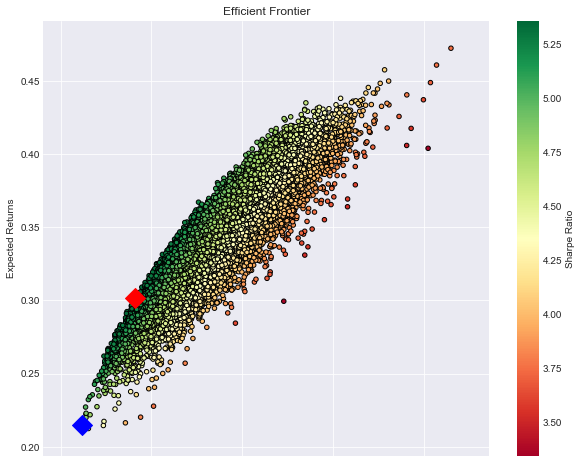

In [7]:
selected = params['symbols']

# get daily and covariance of returns of the stock
cov_daily = daily_returns.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(performance)
num_portfolios = 25000

#set random seed for reproduction's sake
np.random.seed(101)

returns_annual = performance['Annual Return']

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [8]:
sp = sharpe_portfolio.drop(['Returns','Volatility','Sharpe Ratio'],axis=1)
mvp = min_variance_port.drop(['Returns','Volatility','Sharpe Ratio'],axis=1)

In [9]:
%%opts Bars [xrotation=45]
m = mvp.hvplot.bar(ylim=(0,1),title="Minimum Variance Portfolio")
s = sp.hvplot.bar(ylim=(0,1),title="Maximum Sharpe Portfolio")
d = (m + s).cols(1)
d

:Layout
   .Bars.I  :Bars   [index,Variable]   (value)
   .Bars.II :Bars   [index,Variable]   (value)

In [10]:
apv = comp.copy()
apv['Min Variance Portfolio'] = comp @ mvp.T.values
apv['Max Sharpe Portfolio'] = comp @ sp.T.values

apv.hvplot.line(y=['Min Variance Portfolio','Max Sharpe Portfolio'],logy=False,title="Optimal Portfolio Performance")

:NdOverlay   [Variable]
   :Curve   [index]   (value)